# Exercise 02

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [3]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
import zipfile
with zipfile.ZipFile('../datasets/income.csv.zip', 'r') as z:
    f = z.open('income.csv')
    income = pd.read_csv(f, index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [4]:
income.shape

(32561, 15)

# Exercise 2.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

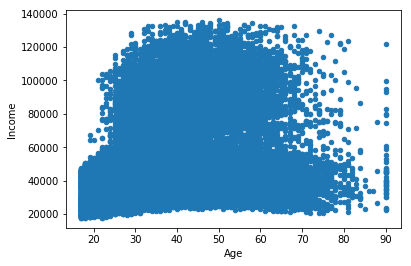

In [5]:
income.plot(x='Age', y='Income', kind='scatter')

In [6]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['Age']
X = income[feature_cols]
y = income.Income
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
# Incremento del ingreso dado un aaumento en la edad. 
linreg.coef_

array([542.16765707])

In [7]:
# make predictions for all values of X
income['incomePred'] = linreg.predict(X)
predictionFrame = income[['Age','incomePred']]
sortedPrediction = predictionFrame.sort_values('Age')
sortedPrediction.drop_duplicates()

,Age,incomePred
12318,17,41754.938301
29146,18,42297.105958
15189,19,42839.273615
10892,20,43381.441272
15823,21,43923.608929
928,22,44465.776586
4594,23,45007.944244
26733,24,45550.111901
7136,25,46092.279558
6878,26,46634.447215


# Exercise 2.2
Evaluate the model using the MSE

In [10]:
from sklearn import metrics
import numpy as np
print('The MSE is:', metrics.mean_squared_error(income['Income'], income['incomePred'] ))

MSE: 593783043.8402297



# Exercise 2.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

In [14]:
linearRegression2= LinearRegression()
income['Age^2'] = income['Age']**2
linearRegression2.fit(income[['Age','Age^2']],income['Income'])

# make predictions for all values of X
income['incomePred2'] = linearRegression2.predict(income[['Age','Age^2']])
predictionFrame = income[['Age','incomePred2']]
sortedPrediction = predictionFrame.sort_values('Age')
sortedPrediction.drop_duplicates()

,Age,incomePred2
12318,17,28187.975822
29146,18,30250.726600
15189,19,32252.390556
10892,20,34192.967691
15823,21,36072.458006
928,22,37890.861500
4594,23,39648.178173
26733,24,41344.408025
7136,25,42979.551056
6878,26,44553.607267


# Exercise 2.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

In [35]:
#linearRegression3= LinearRegression()
income['SexNum'] = income.Sex.map({'Male':1, 'Female':0})
income.head()


,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income,incomePred,Age^2,incomePred2,RaceNum,SexNum
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0,53682.626757,1521,59457.437308,1.0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0,59646.470984,2500,64004.910071,1.0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0,53140.459100,1444,58677.509768,1.0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0,61272.973956,2809,63962.306678,NaN,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0,47718.782529,784,47518.459225,NaN,0


In [36]:
linearRegression3.fit(income[['Age','SexNum']],income['Income'])

# make predictions for all values of X
income['incomePred3'] = linearRegression3.predict(income[['Age','SexNum']])
predictionFrame = income[['Age','incomePred3']]
sortedPrediction = predictionFrame.sort_values('Age')
sortedPrediction.drop_duplicates()


,Age,incomePred3
12318,17,28287.282252
6312,17,50618.860460
29146,18,28761.023308
31905,18,51092.601516
15189,19,51566.342573
20470,19,29234.764365
10892,20,29708.505422
10982,20,52040.083630
15823,21,52513.824687
26568,21,30182.246479


In [37]:
from sklearn import metrics
import numpy as np
print('The MSE is:', metrics.mean_squared_error(income['Income'], income['incomePred3'] ))

The MSE is: 484257359.27143776


##### Se puede observar que al incluir el factor genero el MSE \n disminuye con respecto a cuando solo se incluye la edad. 

# Exercise 2.5


Estimate a logistic regression to predict if a person is in the United States.

What is the performance of the model

In [41]:
income['isUS'] = (income['Country'] == 'United-States')*1.0
income['isUS'].value_counts()

1.0    29170
0.0     3391
Name: isUS, dtype: int64

In [45]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e9)

X = income[['Income']]
y = income.isUS
logreg.fit(X, y)
income['country_pred_class'] = logreg.predict(X)


print("The accuracy is:", logreg.score(X,y))

The accuracy is: 0.895857006848684
